In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

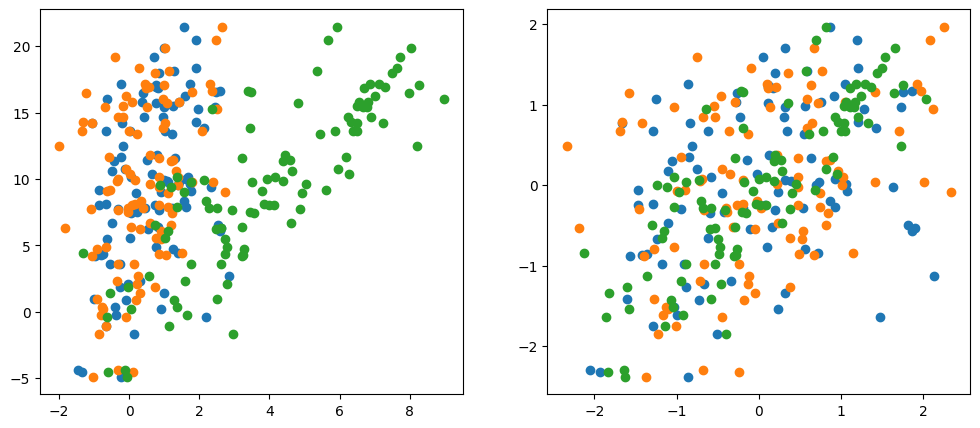

In [91]:
sample = 100

m = 2
b = 3
np.random.seed(0)
X1 = 1 * np.random.rand(sample, 1) + np.random.randn(sample, 1) 
X2 = 1 * np.random.rand(sample, 1) + np.random.randn(sample, 1) 
X3 = 8 * np.random.rand(sample, 1) + np.random.randn(sample, 1) 
y = m*X1 + m*X2 + m*X3 + np.random.randn(sample, 1) * 2

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(X1, y)
plt.scatter(X2, y)
plt.scatter(X3, y)

sc = StandardScaler()
X1 = sc.fit_transform(X1)
X2 = sc.fit_transform(X2)
X3 = sc.fit_transform(X3)
y = sc.fit_transform(y)

plt.subplot(1,2,2)
plt.scatter(X1, y)
plt.scatter(X2, y)
plt.scatter(X3, y)

In [92]:
def hx(X1, X2, X3, slope1, slope2, slope3):
    return (slope1 * X1) + (slope2 * X2) + (slope3 * X3)

X_1 = pd.DataFrame(X1, columns=["X1"])
X_2 = pd.DataFrame(X2, columns=["X2"])
X_3 = pd.DataFrame(X3, columns=["X3"])
X = pd.concat([X_1, X_2, X_3], axis=1)
print(X)

          X1        X2        X3
0  -1.241508  0.525053 -0.494264
1   0.921239  0.743811 -1.039128
2   0.390723 -0.715922  0.183146
3  -1.604839 -1.279983 -0.579418
4   1.207904 -1.662587  0.962938
..       ...       ...       ...
95  0.193432  0.356908  1.440896
96 -0.854523 -0.945735  0.905041
97 -1.292958 -1.011487 -1.139499
98 -0.282625  1.043472  1.062944
99 -0.622906 -0.359662  0.991549

[100 rows x 3 columns]


In [93]:
print(pd.DataFrame(hx(X1, X2, X3, 1, 1, 1,)))


           0
0  -1.210719
1   0.625922
2  -0.142054
3  -3.464240
4   0.508255
..       ...
95  1.991237
96 -0.895217
97 -3.443944
98  1.823791
99  0.008981

[100 rows x 1 columns]


In [94]:
def gradient(interation, X1, X2, X3, y):
    lr = 0.1
    w0_1 = 1
    w0_2 = 1
    w0_3 = 1
    m = len(y)
    slo_w1 = []
    slo_w2 = []
    slo_w3 = []
    
    for _ in range(interation):

        step0 = hx(X1, X2, X3, w0_1, w0_2, w0_3)
        step1 = np.subtract(step0, y)
        
        w_1 = step1 * X1
        w_2 = step1 * X2
        w_3 = step1 * X3

        w_1 = np.sum(w_1) * (1/m)
        w_2 = np.sum(w_2) * (1/m)
        w_3 = np.sum(w_3) * (1/m)

        result_w1 = lr*(w_1)
        result_w2 = lr*(w_2)
        result_w3 = lr*(w_3)

        w0_1 -= result_w1
        w0_2 -= result_w2
        w0_3 -= result_w3
       
        slo_w1.append(w0_1)
        slo_w2.append(w0_2)
        slo_w3.append(w0_3)

    
    return slo_w1, slo_w2, slo_w3




In [95]:
iterations = 35
w0_1, w0_2, w0_3 = gradient(iterations, X1, X2, X3, y)
p_w1 = []
p_w2 = []
p_w3 = []

for i in w0_1:
    p_w1.append(i)
    
for j in w0_2:
    p_w2.append(j)

for k in w0_3:
    p_w3.append(k)

print(p_w1[-1])
print(p_w2[-1])
print(p_w3[-1])

0.3318751946003326
0.32610384298254896
0.8472673193063172


In [96]:

def costfuction(y, w0_1, w0_2, w0_3):
    m = len(y)
    output = []
    
    step0 = hx(X1, X2, X3, w0_1, w0_2, w0_3)
    step1 = np.subtract(step0, y)
    step2 = step1**2
    step3 = np.sum(step2)
    step4 = step3 * (1 / (2 * m))
    output.append(step4)
    return output

0.3318751946003326
0.32610384298254896
0.8472673193063172


Text(0.5, 1.0, 'W0_3')

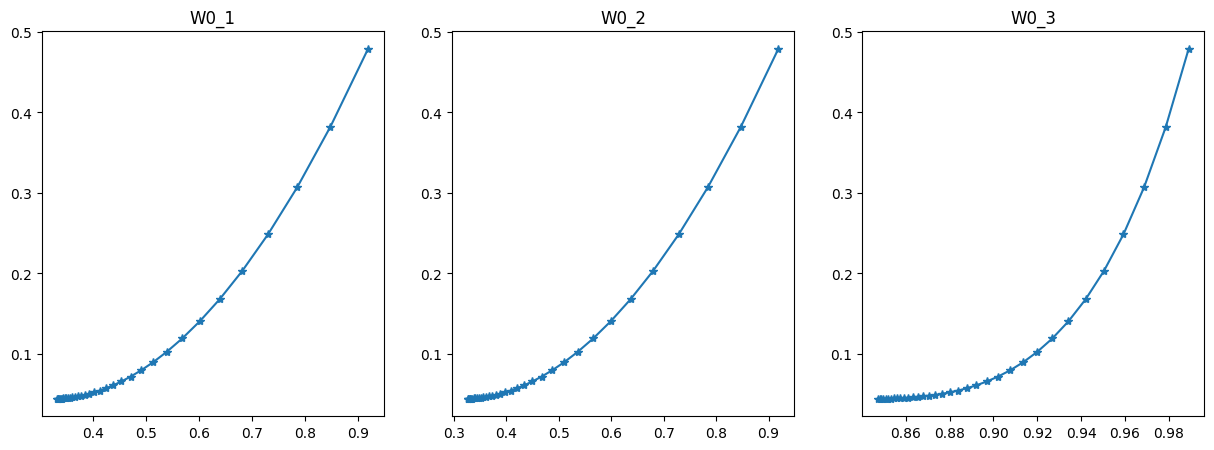

In [97]:
cost = []
for i in range(iterations):
    output = costfuction(y, p_w1[i], p_w2[i], p_w3[i])
    
    cost.append(output)
print(p_w1[-1])
print(p_w2[-1])
print(p_w3[-1])

#print(pd.DataFrame(p_w1))
#print(pd.DataFrame(cost))
plt.figure(figsize=(15, 5)) 
plt.subplot(1,3,1)
plt.plot(p_w1, cost, marker='*')
plt.title("W0_1")

plt.subplot(1,3,2)
plt.plot(p_w2, cost, marker='*')
plt.title("W0_2")

plt.subplot(1,3,3)
plt.plot(p_w3, cost, marker='*')
plt.title("W0_3")

In [98]:
y_predict = hx(X1, X2, X3, p_w1[-1], p_w2[-1], p_w3[-1])

y_true = pd.DataFrame(y, columns=["y true"])
y_pred = pd.DataFrame(y_predict, columns=["y predict"])


print(pd.concat([y_true, y_pred], axis=1))

mse1_1 = np.subtract(y, y_predict)
mse2_1 = mse1_1**2
mse3_1 = np.mean(mse2_1)
print("Mean sq error",mse3_1)

      y true  y predict
0  -0.667211  -0.659577
1  -0.274880  -0.332123
2   0.047265   0.051379
3  -1.410797  -1.440936
4   0.783344   0.674563
..       ...        ...
95  1.389452   1.401409
96  0.355238   0.174809
97 -1.757269  -1.724411
98  1.036778   1.147082
99  0.678838   0.516093

[100 rows x 2 columns]
Mean sq error 0.08808502907145244


In [99]:
print(X.head(5))
print(pd.DataFrame(y, columns=["Y"]).head(5))

Xt = np.transpose(X)
Xt_X = np.dot(Xt, X)
Xt_X_inv = np.linalg.inv(Xt_X)
Xt_y = np.dot(Xt, y)
theta = np.dot(Xt_X_inv, Xt_y)
print(theta)

y_predict_normal = hx(X1, X2, X3, theta[0], theta[1], theta[2])

mse1 = np.subtract(y, y_predict_normal)
mse2 = mse1**2
mse3 = np.mean(mse2)
print("Mean sq error normal",mse3)
print("Mean sq error gradiant",mse3_1)

         X1        X2        X3
0 -1.241508  0.525053 -0.494264
1  0.921239  0.743811 -1.039128
2  0.390723 -0.715922  0.183146
3 -1.604839 -1.279983 -0.579418
4  1.207904 -1.662587  0.962938
          Y
0 -0.667211
1 -0.274880
2  0.047265
3 -1.410797
4  0.783344
[[0.32397634]
 [0.31744377]
 [0.83969025]]
Mean sq error normal 0.08787195295599162
Mean sq error gradiant 0.08808502907145244
